# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [118]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [119]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [120]:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [121]:
def clean(x): 
    n = float(''.join(e for e in x if e.isdigit() or e=='.'))
    if x[-1] == 'K':
        n= n/1000
    return n

In [122]:
fifa['num_value'] = fifa['Value'].apply(clean)


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [123]:
fifa.rename(columns={"Preferred Foot": "preferred_foot"}, inplace=True)
#First we fit the data to a linear regression
model = ols(formula = "num_value ~ C(Position) + C(preferred_foot)", data=fifa).fit()
#THen we evaluate the general variable by running an anova test on the ols
table = sm.stats.anova_lm(model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(Position),16570.015128,26.0,20.885022,1.634952e-96
C(preferred_foot),234.162243,1.0,7.673655,5.608990e-03
Residual,552902.860021,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

*It appears that there is no relationship between the preferred foot and a player's value, but some positions are more or less prone to increase or decrease the value of a player*


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [134]:
#First we fit the data to a linear regression
model = ols(formula = "num_value ~ Nationality", data=fifa).fit()
#THen we evaluate the general variable by running an anova test on the ols
table = sm.stats.anova_lm(model, typ=2)
table


,sum_sq,df,F,PR(>F)
Nationality,32828.995997,162.0,6.719634,5.651112e-132
Residual,535448.410562,17755.0,NaN,NaN


What is your conclusion from this ANOVA?

*The nationality of a player may influence his/her value. In this case, one can interpret the F statistic because is only one categorical variable that we are studying. The low F value indicates that, although Nationality affects the value of the player, the variation is very low. In fact if you take a look at `model.summary()` you will see that only players from one or two countries have a significant p value and they're value is lower than the mean, and the rest of nationalities are within the mean. And that's racist :P*

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [125]:
fifa.isnull().sum()
fifa.dropna(axis=0, inplace=True)
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
preferred_foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
num_value         0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [126]:
const = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])


*I think is not necessary using add_constant when using the ols function, because ols models an intercept by default. You have to specify it with `-1` if you do not want an intercept*

In [127]:
model = ols(formula = "num_value ~ Stamina + SprintSpeed", data=fifa).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_value   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          8.04e-193
Time:                        18:45:00   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.0700      0.197    -15.600      0.000      -3.456      -2.684
Stamina         0.0604      0.003     18.349      0.000       0.054       0.067
SprintSpeed     0.0263      0.004      7.380      0.000       0.019       0.033
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

*Because p value is lower than 0.05 for Stamina, that indicates that players with high stamina have in general lower values. SprintSpeed has a less strong relationship with the value. Both relationships being positive. However, the r squared of the model is very small, which indicates a very low predictive power. The low F statistic may indicate low dispersion in the variables. But I do not think is very recommended trying to interpret the F statistic in polynomial models...*

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [131]:
model = ols(formula = "num_value ~ Potential", data=fifa).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_value   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:48:01   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.4390      0.400    -88.693      0.000     -36.222     -34.656
Potential      0.5312      0.006     95.172      0.000       0.520       0.542
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

*The potential shows a clearer positive relationship with value. The more potential, the higher the value... and the r squared, although not very large, is larger than the one before*


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

Text(0, 0.5, 'Potential')

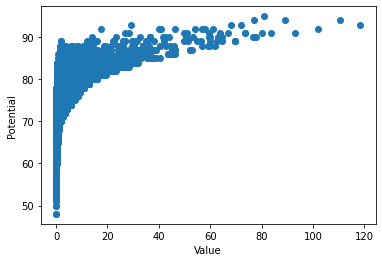

In [132]:
plt.scatter(fifa['num_value'], fifa['Potential'])
plt.xlabel('Value')
plt.ylabel('Potential')